# Visualise correlation between features and feature selection

In [15]:
## import necesarry libraries
import dython
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from collections import Counter
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [16]:
## read in data
instances_long = pd.read_csv('data/ships_extended.csv', index_col=0)
instances_short = pd.read_csv('data/west_extended.csv')

X_train, X_test, y_train, t_test = train_test_split(instances_long.drop(['epithet_gr', 'epithet_en'], axis=1), instances_long['epithet_en'], test_size=0.2)

In [17]:
## count occurences of the label
gr_dict = Counter(instances_long['epithet_gr'])
en_dict = Counter(instances_long['epithet_en'])

Categorical input = chi-square chi2() or mutual information mutual_info_classif() or mutual_info_regression()

Numerical input = ANOVA f_classif() or Kendall's kendalltau

In [18]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

X = X_train[['ship', 'number', 'case', 'scansion', 'book', 'position']]
y = y_train

#chi2_selector = SelectKBest(chi2, k=3)
#X_kbest = chi2_selector.fit_transform(X, y)
#X_kbest

mi_score = mutual_info_classif(X,y)

In [26]:
mi_score

array([0.        , 0.59599446, 0.13225386, 0.00699017, 0.0649207 ,
       0.34103886])

In [21]:
## distinguish features
cat_nom = ['ship', 'number', 'case', 'scansion']
cat_ord = ['book', 'position']
num_dis = ['num_lines', 'difference']
num_con = ['line', 'ratio']

<AxesSubplot:>

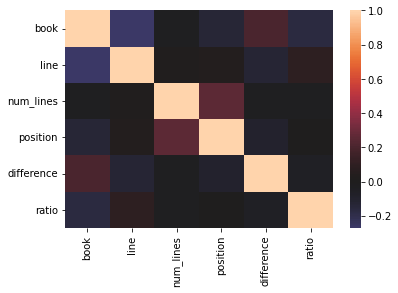

In [22]:
continuous = instances_long.drop(cat_nom, axis=1)
correlation_matrix = continuous.corr(method='pearson')
sns.heatmap(correlation_matrix, cmap=sns.color_palette("icefire", as_cmap=True), center=0)

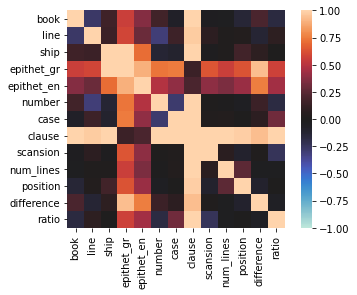

In [23]:
correlation_matrix = dython.nominal.associations(instances_long.drop(['bigrams', 'trigrams'], axis=1), annot=False)

In [24]:
sorted_mat = correlation_matrix['corr'].unstack().sort_values()

# Reformat series into data frame
df = pd.DataFrame(data=sorted_mat)
df.rename({0:'correlation'}, axis=1, inplace=True)
df['Index'] = df.index
df = pd.concat(
        [df.drop('Index', axis=1), 
        df['Index'].apply(pd.Series)]
    , axis=1)

# Output correlation list
correlations = pd.DataFrame(df[df[0] == 'epithet_en']['correlation'])
correlations = correlations.sort_values(by='correlation', ascending=False)

# Remove multi-level indexing
correlations.index = correlations.index.droplevel(0)

correlations = correlations.drop('epithet_en')
correlations

,correlation
epithet_gr,0.895220
difference,0.752377
ship,0.708272
number,0.487783
ratio,0.443604
position,0.420263
case,0.395001
scansion,0.389567
book,0.364857
num_lines,0.339294


In [25]:
# Test for relationship with categorical variables using one-way ANOVA
categoricals = cat_nom + cat_ord

for c in categoricals:
    print(c)
    model = ols('epithet_en ~ '+c, data = instances_long).fit() # ordinary least squares
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)

ship


ValueError: endog has evaluated to an array with multiple columns that has shape (158, 17). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).